In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/models/research")
sys.path.append("/content/drive/My Drive/Colab Notebooks/models/research/slim")

In [0]:
# evaluate the model
!export PYTHONPATH=PYTHONPATH:"/content/drive/My Drive/Colab Notebooks/models/research":"/content/drive/My Drive/Colab Notebooks/models/research/slim" && cd "/content/drive/My Drive/Colab Notebooks/models/research" && python object_detection/legacy/eval.py --logtostderr --checkpoint_dir="/content/drive/My Drive/Colab Notebooks/workspace/training_demo/training" --eval_dir="/content/drive/My Drive/Colab Notebooks/workspace/training_demo/eval" --pipeline_config_path="/content/drive/My Drive/Colab Notebooks/workspace/training_demo/training/faster_rcnn_resnet101_coco.config"

In [0]:
# train the model
!export PYTHONPATH=PYTHONPATH:"/content/drive/My Drive/Colab Notebooks/models/research":"/content/drive/My Drive/Colab Notebooks/models/research/slim" && cd "/content/drive/My Drive/Colab Notebooks/models/research" && python object_detection/model_main.py --aslologtostderr --model_dir="/content/drive/My Drive/Colab Notebooks/workspace/training_demo/training" --pipeline_config_path="/content/drive/My Drive/Colab Notebooks/workspace/training_demo/training/faster_rcnn_resnet101_coco.config"

In [0]:
# export the model
!export PYTHONPATH=PYTHONPATH:"/content/drive/My Drive/Colab Notebooks/models/research":"/content/drive/My Drive/Colab Notebooks/models/research/slim" && cd "/content/drive/My Drive/Colab Notebooks/models/research" && python object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path "/content/drive/My Drive/Colab Notebooks/workspace/training_demo/training/faster_rcnn_resnet101_coco.config" --trained_checkpoint_prefix "/content/drive/My Drive/Colab Notebooks/workspace/training_demo/training/model.ckpt-585766" --output_directory "/content/drive/My Drive/Colab Notebooks/trained-inference-graph_v3"

In [0]:
!git clone --depth 1 https://github.com/tensorflow/models
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.
!cd models/research/ && pip install .

In [0]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [0]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [0]:
!export PYTHONPATH=PYTHONPATH:"/content/drive/My Drive/Colab Notebooks/models/research":"/content/drive/My Drive/Colab Notebooks/models/research/slim" && cd "/content/drive/My Drive/Colab Notebooks/scripts/preprocessing" && python ./generate_csv.py -i "/content/drive/My Drive/data/test" -o "/content/drive/My Drive/Colab Notebooks/workspace/training_demo/annotations/test_labels.csv"

Converting ...
Successfully converted to csv


In [0]:
!export PYTHONPATH=PYTHONPATH:"/content/drive/My Drive/Colab Notebooks/models/research":"/content/drive/My Drive/Colab Notebooks/models/research/slim" && cd "/content/drive/My Drive/Colab Notebooks/scripts/preprocessing" && python ./generate_tfr.py --csv_input="/content/drive/My Drive/Colab Notebooks/workspace/training_demo/annotations/test_labels.csv" --img_path="/content/drive/My Drive/data/test/plots" --output_path="/content/drive/My Drive/Colab Notebooks/workspace/training_demo/annotations/test.record"

In [0]:
import numpy as np
import os
import pathlib
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [0]:
def load_model(model_dir):

  model_dir = pathlib.Path(model_dir)/"saved_model"
  print(model_dir)
  model = tf.saved_model.load(str(model_dir))
  model = model.signatures['serving_default']

  return model

In [8]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/My Drive/Colab Notebooks/workspace/training_demo/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
category_index

{1: {'id': 1, 'name': 'title'},
 2: {'id': 2, 'name': 'legend'},
 3: {'id': 3, 'name': 'x_label'},
 4: {'id': 4, 'name': 'y_label'},
 5: {'id': 5, 'name': 'x_title'},
 6: {'id': 6, 'name': 'y_title'}}

In [18]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/content/drive/My Drive/test_dir')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('/content/drive/My Drive/test_dir/train_318.jpg'),
 PosixPath('/content/drive/My Drive/test_dir/train_357.jpg')]

In [10]:
model_name = '/content/drive/My Drive/Colab Notebooks/trained-inference-graph'
detection_model = load_model(model_name)

/content/drive/My Drive/Colab Notebooks/trained-inference-graph/saved_model
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
print(detection_model.inputs)
print(detection_model.output_dtypes)
detection_model.output_shapes

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]
{'raw_detection_scores': tf.float32, 'detection_multiclass_scores': tf.float32, 'detection_classes': tf.float32, 'num_detections': tf.float32, 'detection_boxes': tf.float32, 'raw_detection_boxes': tf.float32, 'detection_features': tf.float32, 'detection_scores': tf.float32}


{'detection_boxes': TensorShape([None, 300, 4]),
 'detection_classes': TensorShape([None, 300]),
 'detection_features': TensorShape([None, None, None, None, None]),
 'detection_multiclass_scores': TensorShape([None, 300, 7]),
 'detection_scores': TensorShape([None, 300]),
 'num_detections': TensorShape([None]),
 'raw_detection_boxes': TensorShape([None, 300, 4]),
 'raw_detection_scores': TensorShape([None, 300, 7])}

In [0]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  output_dict = model(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [0]:
from aip import AipOcr
import cv2
import time
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  #image_np = np.array(Image.open(image_path))
  st = time.time()
  image_np = cv2.imread(str(image_path))
  image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  scores = output_dict["detection_scores"]
  classes = output_dict["detection_classes"][scores > CONFIDENCE]
  boxes = output_dict["detection_boxes"][scores > CONFIDENCE]
  scores = scores[scores > CONFIDENCE]
  client = AipOcr(APP_ID, API_KEY, SECRET_KEY)
  print("inference time %f" % (time.time() - st))
  result_dict, scale, img_list = extract_and_recognize_text(output_dict, image_np, client)
  for i,img in enumerate(img_list):
    cv2.imwrite("{}.jpg".format(i), img)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      boxes,
      classes,
      scores,
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=3)

  display(Image.fromarray(image_np))

inference time 0.393647
defaultdict(<class 'int'>, {100: 2, 4: 4, 2: 2, 0: 4, 92: 2, 30: 2, 24: 2, 1: 2})


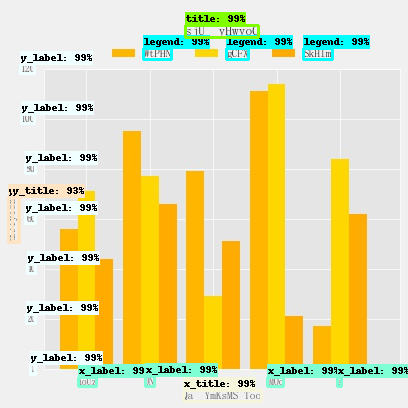

14.57516884803772
inference time 0.392672
defaultdict(<class 'int'>, {10: 42, 11: 4, 12: 4, 13: 2, 15: 2, 20: 2})


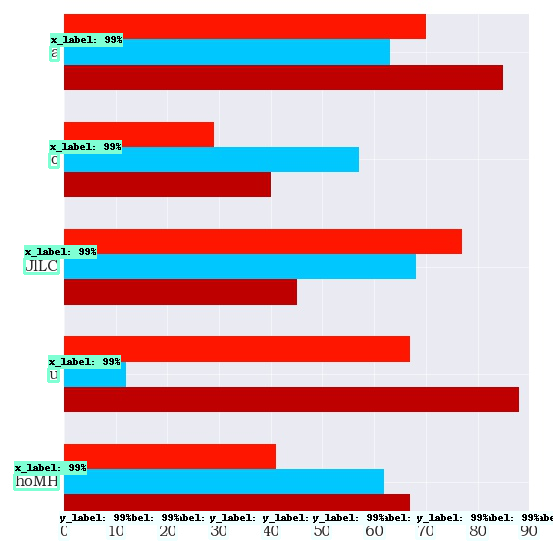

12.547287464141846


In [35]:
for image_path in TEST_IMAGE_PATHS:
  st = time.time()
  show_inference(detection_model, image_path)
  print(time.time() - st)

In [0]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)

In [0]:
import time
def extract_and_recognize_text(output_dict, image, client):
    
    # preprocess the image
    #cv2.imwrite("original.jpg", image)
    height, width = image.shape[:2]
    #print(image.shape)
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #thresh, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # choose the result that have high confidence
    scores = output_dict["detection_scores"]
    classes = output_dict["detection_classes"][scores > CONFIDENCE]
    boxes = output_dict["detection_boxes"][scores > CONFIDENCE]
    scores = scores[scores > CONFIDENCE]

    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
    result_dict = {}
    for _, v in category_index.items():
        result_dict[v["name"]] = []
    img_list = []
    for i in range(len(scores)):
        ymin = int(boxes[i][0] * height)
        xmin = int(boxes[i][1] * width)
        ymax = int(boxes[i][2] * height)
        xmax = int(boxes[i][3] * width)
        
        # crop a little bit larger area
        if ymin - MARGIN >= 0:
            ymin -= MARGIN
        if xmin - MARGIN >= 0:
            xmin -= MARGIN
        if ymax + MARGIN <= height:
            ymax += MARGIN
        if xmax + MARGIN <= width:
            xmax += MARGIN
        #print(category_index[classes[i]]["name"], xmin, ymin, xmax, ymax)
        cropped_img = image[ymin:ymax, xmin:xmax]
        # if we have vertical oriented text
        if cropped_img.shape[0] > cropped_img.shape[1]:
            cropped_img = np.transpose(cropped_img, axes=(1, 0, 2))

        #cropped_img = cv2.resize(cropped_img, (cropped_img.shape[0] * 2, cropped_img.shape[1] * 2))
        img_list.append(cropped_img)

        res_, encoded_img = cv2.imencode(".png", cropped_img)
        options = {}
        options["language_type"] = "ENG"
        options["probability"] = "true"
        ocr_result = client.basicGeneral(encoded_img, options)
        #time.sleep(1)
        #print(ocr_result)
        if "error_code" in ocr_result or ocr_result["words_result_num"] == 0:
            continue
        text_class= category_index[classes[i]]["name"]
        if text_class in ["x_label", "y_label", "legend"]:
            result_dict[text_class].append({"text":ocr_result["words_result"][0]["words"], "bbox":[xmin, ymin, xmax, ymax]})
        else:
            result_dict[text_class].append(ocr_result["words_result"][0]["words"])
    
    result_dict["x_label"] = order_text_list(result_dict["x_label"], False)
    result_dict["y_label"], scale = order_text_list(result_dict["y_label"], True)
    result_dict["legend"] = order_text_list(result_dict["legend"], False)

    return result_dict, scale, img_list

def order_text_list(text_list, is_get_scale):
    if len(text_list) == 0:
        return []
    
    x_list = []
    y_list = []
    for item in text_list:
        x_list.append((item["bbox"][0] + item["bbox"][2]) / 2)
        y_list.append((item["bbox"][1] + item["bbox"][3]) / 2)

    if np.std(x_list) < np.std(y_list):
        # vertical
        text_list = sorted(text_list, key=lambda item: (item["bbox"][1] + item["bbox"][3]) / 2)
    else:
        text_list = sorted(text_list, key=lambda item: (item["bbox"][0] + item["bbox"][2]) / 2)
    
    sorted_text_list = [i["text"] for i in text_list]
    if not is_get_scale:
        return sorted_text_list
    # calculate scale
    # assumption: bbox data is correct
    count = defaultdict(int)
    for i in range(len(text_list)):
        for j in range(len(text_list)):
            if i != j:
                try:
                  dist = abs(int(text_list[i]["text"]) - int(text_list[j]["text"])) / abs(i - j)
                  count[int(dist)] += 1
                except:
                  pass

    frequent_dist = 0
    max_count = 0
    for k, v in count.items():
        if v > max_count:
            frequent_dist = k
            max_count = v
    print(count)
    if np.std(x_list) < np.std(y_list):
        #vertical
        y_dist_list = [(item["bbox"][1] + item["bbox"][3]) / 2 for item in text_list]
    else:
        y_dist_list = [(item["bbox"][0] + item["bbox"][2]) / 2 for item in text_list]
    dist_sum = []
    for i in range(len(y_dist_list) - 1):
      dist_sum.append(abs(y_dist_list[i + 1] - y_dist_list[i]))

    scale= frequent_dist / np.mean(dist_sum)

    return sorted_text_list, scale

def get_textinfo(image_path):

    model = load_model()
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    output_dict = run_inference_for_single_image(model, img)
    client = AipOcr(APP_ID, API_KEY, SECRET_KEY)
    result_dict = extract_and_recognize_text(output_dict, img, client)

    return result_dict

In [0]:
CONFIDENCE = 0.9
MARGIN = 5
APP_ID = '16244347'
API_KEY = '3qHaDdv33HVwWvYsEiS7X8i9'
SECRET_KEY = '48cMDGIwytaHwFNdtrn9nbG5mjMPDsXn'

In [13]:
!pip install baidu-aip

  Created wheel for baidu-aip: filename=baidu_aip-2.2.18.0-cp36-none-any.whl size=15655 sha256=81044a8d12d0f326c2abe88c398078aa2248424574b1180ef53eba1b8f418fe6
  Stored in directory: /root/.cache/pip/wheels/5e/f3/20/9567d96b1140f13546bb3e059827cba0d575e213e8ee87f5ea
Successfully built baidu-aip


In [0]:
path = '/content/drive/My Drive/data/test/plots/test_27.png'
with open(path, "rb") as f:
  data = f.read()
client = AipOcr(APP_ID, API_KEY, SECRET_KEY)
options = {}
options["language_type"] = "ENG"
ocr_result = client.basicAccurate(data, options)

image_np = cv2.imread(path)
display(Image.fromarray(image_np))
ocr_result

In [0]:
!python char2data_run.py

In [0]:
%load_ext autoreload
%autoreload 2

import os
from aip import AipOcr
import tensorflow as tf

from model_number import evaluate, restore_model
from model_text import get_textinfo, load_model
from remote_config import *

In [0]:
encoder, decoder, _optimizer = restore_model()
text_extractor = load_model()

In [0]:
def run():

    img_list = os.listdir(MODEL_TEST_DIR)
    img_list = [MODEL_TEST_DIR + i for i in img_list]



    # baidu ocr
    client = AipOcr(APP_ID, API_KEY, SECRET_KEY)

    #run both models for every image
    for single_img_path in img_list:

        result_text, scale, orientation, img_shape = get_textinfo(single_img_path, text_extractor, client)
        result_number, attention = evaluate(single_img_path, encoder, decoder)

        result = {}
        for k, v in result_text.items():
            if len(v) != 0 and k != "y_label":
                if k in ["title", "x_title", "y_title"]:
                    result[k] = v[0]
                else:
                    result[k] = v

        result_number = [i[2] for i in result_number]
        w_or_h = img_shape[0] if orientation == "vertical" else img_shape[1]
        result_number = [int(i * w_or_h * scale) for i in result_number]
        result["data"] = result_number

        print(single_img_path, result)
run()

In [0]:
!cd /content/drive/My\ Drive/ && unzip data.zip